In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import FeatureUnion, Pipeline

In [2]:
train = pd.read_csv('data/evo_train.csv.gz', compression='gzip', index_col='id')
categories = pd.read_csv('data/categories_parsed.csv.gz', compression='gzip', index_col='GROUP_ID')
data = train.join(categories, on='GROUP_ID')
print(data.shape)
data.head()

(55860, 4)


,NAME,GROUP_ID,category,sub_category
id,,,,
0,"Пиво ""Жигулевское"" 0,5 л. св.",35,Алкоголь,"Пиво, слабоалкогольные напитки"
1,СОУС ТОМАТНЫЙ БУЗДЯК 670Г ТАТАРСКИЙ /8,6,Прод,Продукты питания
2,Сигареты Esse SS Exchange,7,Непрод,Табачные изделия
3,Петрушка,6,Прод,Продукты питания
4,пиво ягерь,35,Алкоголь,"Пиво, слабоалкогольные напитки"


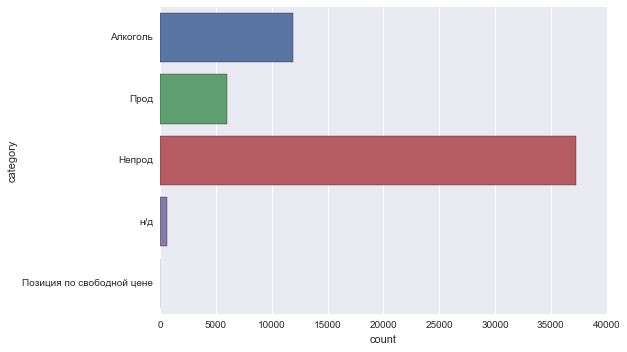

In [3]:
sns.countplot(y='category', data=data)

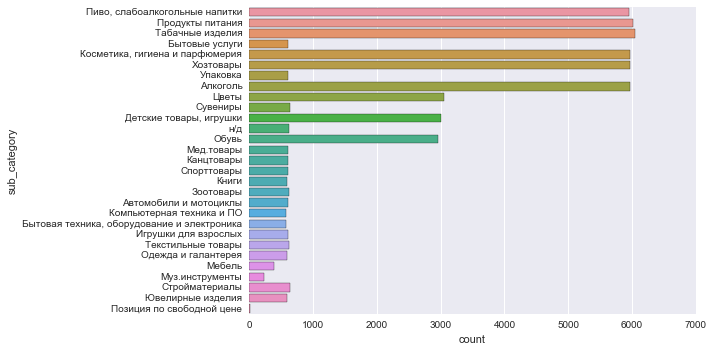

In [4]:
sns.countplot(y='sub_category', data=data)

In [3]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data['NAME'])
X_train_counts.shape

(55860, 47106)

In [30]:
clf = MultinomialNB()
scores = cross_val_score(clf, X_train_counts, data['category'], cv=StratifiedKFold(n_splits=5), scoring='neg_log_loss')
print('LogLoss: {}, std: {}'.format(scores.mean(), scores.std()*2))

LogLoss: -0.13169387490366274, std: 0.01404404379267047


In [54]:
clf = MultinomialNB()
scores = cross_val_score(clf, X_train_counts, data['sub_category'], cv=StratifiedKFold(n_splits=5), scoring='neg_log_loss')
print('LogLoss: {}, std: {}'.format(scores.mean(), scores.std()*2))

LogLoss: -0.4937528934688027, std: 0.025064390124077764


In [40]:
clf = SGDClassifier(loss='log')
scores = cross_val_score(clf, X_train_counts, data['category'], cv=StratifiedKFold(n_splits=5), scoring='neg_log_loss')
print('LogLoss: {}, std: {}'.format(scores.mean(), scores.std()*2))

LogLoss: -0.20421370456861795, std: 0.00898007940528407


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train_counts, data[['category', 'sub_category']], test_size=0.33, random_state=42)

In [23]:
clf = MultinomialNB()
clf.fit(X_train, y_train['category'])
pred = clf.predict(X_test)
print(classification_report(y_test['category'], pred))

                           precision    recall  f1-score   support

                 Алкоголь       0.97      0.97      0.97      3944
                   Непрод       0.97      0.97      0.97     12333
Позиция по свободной цене       0.00      0.00      0.00         4
                     Прод       0.85      0.87      0.86      1955
                      н/д       0.96      0.83      0.89       198

              avg / total       0.96      0.96      0.96     18434



/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
categories = csr_matrix(pd.get_dummies(y_train['category'], sparse=True))
X_train_with_categories = hstack((X_train, categories))

In [39]:
clf = MultinomialNB()
scores = cross_val_score(clf, X_train_with_categories, data['category'], cv=StratifiedKFold(n_splits=5), scoring='neg_log_loss')
print('LogLoss: {}, std: {}'.format(scores.mean(), scores.std()*2))

ValueError: Found input variables with inconsistent numbers of samples: [37426, 55860]